### Figure S8

Shows bar-diagrams: with for each country, the EAD

In [2]:
import sys
sys.path.append("..") #import folder which is one level higher

import geopandas as gpd
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np
import os as os
import pandas as pd
import seaborn as sns

from tqdm import tqdm

from utils_functions import load_config
from postproc_functions import *

pd.set_option('max_columns', 100)

In [2]:
### SELECT THE REGIONS FOR WHICH TO LOAD THE RESULTS
#pp_out_path = load_config()['paths']['postproc_output']
pp_out_path = r"D:\Europe_trade_disruptions\EuropeFloodResults\Model09_beta\postproc"
baseline_results = os.path.join(pp_out_path,'baseline')                              

NUTS0 = NUTS_0_list(EU28=True,EFTA=True,CAND=True) #draw the list of NUTS-0 regions
NUTS0 = [e for e in NUTS0 if e not in ['IS','MT','CY','TR']] #drop Iceland, Malta, Cyprus and Turkey
NUTS3_lst = []
for N0 in NUTS0:
    NUTS3_lst.extend(NUTS_up(N0,True)) #find all the correspondign NUTS-3 regions
regions = [elem for elem in NUTS3_lst if elem not in NUTS_3_remote(Overseas=True,Creta=True,Spain=True)]

### LOAD AND STRUCTURE THE OSM LIGHTING MIX RESULTS WHICH HAVE ALREADY BEEN POSTPROCESSED
df = pd.DataFrame()
exceptions2 = []
for region in tqdm(regions):
    try:
        df = df.append(pd.read_pickle(os.path.join(baseline_results,"{}_EAD_segment_litmix.pkl".format(region))))
    except Exception as e:
        exceptions2.append(str(region)+str(e))
        
#for e in exceptions2:
    #print(e)

  2%|█▌                                                                              | 28/1417 [00:02<02:22,  9.76it/s]


KeyboardInterrupt: 

In [ ]:
def aggregate_byRP(region):
    """Aggregate the results by return period, distinguishing between events below and above the flood protection level
    Used to produce Figure S8.
    
    Arguments:
         *region* (string) -- Name of the NUTS-3 region
    """

In [3]:
region = 'DE224'
df = pd.read_pickle(os.path.join(baseline_results,"{}_EAD_segment_litmix.pkl".format(region)))
df

,infra_type,geometry,lanes,bridge,lit,length,road_type,length_rp10,val_rp10,length_rp20,val_rp20,length_rp50,val_rp50,length_rp100,val_rp100,length_rp200,val_rp200,length_rp500,val_rp500,NUTS-3,NUTS-2,NUTS-1,NUTS-0,dam_C1_rp10,dam_C1_rp20,dam_C1_rp50,dam_C1_rp100,dam_C1_rp200,dam_C1_rp500,dam_C2_rp10,dam_C2_rp20,dam_C2_rp50,dam_C2_rp100,dam_C2_rp200,dam_C2_rp500,dam_C3_rp10,dam_C3_rp20,dam_C3_rp50,dam_C3_rp100,dam_C3_rp200,dam_C3_rp500,dam_C4_rp10,dam_C4_rp20,dam_C4_rp50,dam_C4_rp100,dam_C4_rp200,dam_C4_rp500,dam_C5_rp10,dam_C5_rp20,dam_C5_rp50,dam_C5_rp100,dam_C5_rp200,dam_C5_rp500,dam_C6_rp10,dam_C6_rp20,dam_C6_rp50,dam_C6_rp100,dam_C6_rp200,dam_C6_rp500,dam_HZ_rp10,dam_HZ_rp20,dam_HZ_rp50,dam_HZ_rp100,dam_HZ_rp200,dam_HZ_rp500,Jongman_FP,AoI_rp10,AoI_rp20,AoI_rp50,AoI_rp100,AoI_rp200,AoI_rp500,EAD_C1,EAD_C2,EAD_C3,EAD_C4,EAD_C5,EAD_C6,EAD_HZ,EAD_lowflow,EAD_highflow
osm_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4019778,motorway,"LINESTRING (13.04178 48.77036, 13.04256 48.77006)",3.0,NaN,NaN,0.066293,motorway,0.004590,78,0.004590,102,0.066293,69,0.066293,77,0.066293,87,0.066293,98,DE224,DE22,DE2,DE,891.307865,1336.961798,10687.15236,12630.275655,15059.173333,17730.958202,1782.628614,2589.843296,21374.304719,25260.538427,30118.333783,35461.916404,131.170936,203.48824,1675.937079,1870.251985,2113.139176,2380.325393,1219.241648,1950.789213,14877.00794,17305.905618,20342.021273,23681.758801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,918.634607,1131.540974,12091.754607,13137.192509,14443.993109,15881.475056,150.0,28637.0,28637.0,28637.0,28637.0,28637.0,28637.0,107.722247,215.444494,14.816479,144.77633,0.000000,0.000000,100.236704,14.816479,144.776330
4051029,primary,"LINESTRING (12.92883 48.74648, 12.92995 48.74611)",2.0,NaN,no,0.091771,primary,0.020482,35,0.020482,69,0.020482,99,0.020482,116,0.020482,131,0.020482,146,DE224,DE22,DE2,DE,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,554.162097,992.201648,1308.862022,1403.867865,1483.026517,1562.198052,4433.245243,7937.626067,10470.909064,11230.904270,11864.225019,12497.545768,1649.280300,2075.440899,2748.353858,3045.224569,3302.503071,3559.794457,150.0,29005.0,29005.0,29005.0,29005.0,29005.0,29005.0,0.000000,0.000000,0.000000,0.00000,10.100974,80.782022,22.701423,10.100974,80.782022
4051097,track,"LINESTRING (12.96312 48.81146, 12.96324 48.81119)",1.0,NaN,NaN,0.031360,track,0.001851,234,0.001851,298,0.001851,349,0.001851,379,0.001851,403,0.001851,427,DE224,DE22,DE2,DE,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.027715,3.220974,3.388464,3.478652,3.555955,3.633258,23.860974,24.801498,25.535880,25.973933,26.334682,26.682547,125.347416,142.521648,151.810936,157.183521,161.473858,165.764195,150.0,28481.0,28481.0,28481.0,28481.0,28481.0,28481.0,0.000000,0.000000,0.000000,0.00000,0.025768,0.180375,1.082247,0.025768,0.180375
4051212,service,"LINESTRING (12.96016 48.82960, 12.95944 48.82891)",1.0,NaN,NaN,0.092915,other,0.092893,334,0.092893,398,0.092893,449,0.092893,479,0.092893,503,0.092893,527,DE224,DE22,DE2,DE,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,958.059326,1015.508614,1061.285094,1088.212434,1109.754307,1131.296180,7263.527790,7531.615880,7745.243745,7870.913258,7971.446292,8071.979326,7486.135730,8060.615730,8518.393408,8787.679700,8976.183970,8976.183970,150.0,28481.0,28481.0,28481.0,28481.0,28481.0,28481.0,0.000000,0.000000,0.000000,0.00000,7.459775,53.416629,59.678202,7.459

In [6]:
#rp_sel = 50 #Select the return period to filter out
all_rp = [10,20,50,100,200,500]

#rp_notsel = [str(rp) for rp in all_rp if not rp == rp_sel]
#rp_notsel

cols_to_drop = [] #add the name of the columns to drop here
cols_to_drop.extend([col for col in df.columns if col.split('_')[0] in ["EAD","AoI",'length','val']]) #drop EAD and AoI cols
damcols = [col for col in df.columns if col.split('_')[0] == 'dam']
cols_to_drop.extend([col for col in df.columns if 'dam_HZ' in col])
df2 = df.copy().drop(columns=cols_to_drop)



In [7]:
### Apply the litmix to the df

def litmix_temp(r):
    """Only used for preparing this figure (for full use, see postproc_functions.py -> lighting_blend())
    It does a litmix and averaging of the damage columns (rather then the EAD columns)
    
    Arguments:
        *r* (road segment) -- a row from the df
    """
    damcols = [x for x in list(r.keys()) if 'dam' in x] #select the damcols
    
    #THE APPROPRIATE TUPLE POSITIONS ARE ALREADY SELECTED
    
    #MIX THE MOST APPROPRIATE DAMAGE CURVES
    if r['road_type'] in ['motorway','trunk']:
        if r['lit'] in ['yes','24/7','automatic','disused']: #missing operating times now
            for rp in ['10','20','50','100','200','500']:
                r['dam_rp{}_lowflow'.format(rp)] = r['dam_C1_rp{}'.format(rp)] #select the expensive (accessories) road
                r['dam_rp{}_highflow'.format(rp)] = r['dam_C2_rp{}'.format(rp)]
                r['dam_rp{}_avg'.format(rp)] = r['dam_rp{}_lowflow'.format(rp)] + r['dam_rp{}_highflow'.format(rp)] / 2
        else:
            for rp in ['10','20','50','100','200','500']:
                r['dam_rp{}_lowflow'.format(rp)] = r['dam_C3_rp{}'.format(rp)] #select the cheap (no accessories) road
                r['dam_rp{}_highflow'.format(rp)] = r['dam_C4_rp{}'.format(rp)]
                r['dam_rp{}_avg'.format(rp)] = r['dam_rp{}_lowflow'.format(rp)] + r['dam_rp{}_highflow'.format(rp)] / 2
    else: #for the other road types
        for rp in ['10','20','50','100','200','500']:
            r['dam_rp{}_lowflow'.format(rp)] = r['dam_C5_rp{}'.format(rp)] #select the cheap (no accessories) road
            r['dam_rp{}_highflow'.format(rp)] = r['dam_C6_rp{}'.format(rp)]
            r['dam_rp{}_avg'.format(rp)] = r['dam_rp{}_lowflow'.format(rp)] + r['dam_rp{}_highflow'.format(rp)] / 2
    
    return r

df3 = df2.apply(litmix_temp,axis=1)

to_drop = []
for CX in ['C1','C2','C3','C4','C5','C6']:
    to_drop.extend([col for col in df3.columns if CX in col])
df3.drop(columns=to_drop, inplace=True)
#bridges were already dropped!
df3

,infra_type,geometry,lanes,bridge,lit,road_type,NUTS-3,NUTS-2,NUTS-1,NUTS-0,Jongman_FP,dam_rp10_lowflow,dam_rp10_highflow,dam_rp10_avg,dam_rp20_lowflow,dam_rp20_highflow,dam_rp20_avg,dam_rp50_lowflow,dam_rp50_highflow,dam_rp50_avg,dam_rp100_lowflow,dam_rp100_highflow,dam_rp100_avg,dam_rp200_lowflow,dam_rp200_highflow,dam_rp200_avg,dam_rp500_lowflow,dam_rp500_highflow,dam_rp500_avg
osm_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4019778,motorway,"LINESTRING (13.04178 48.77036, 13.04256 48.77006)",3.0,NaN,NaN,motorway,DE224,DE22,DE2,DE,150.0,131.170936,1219.241648,740.791760,203.488240,1950.789213,1178.882846,1675.937079,14877.007940,9114.441049,1870.251985,17305.905618,10523.204794,2113.139176,20342.021273,12284.149813,2380.325393,23681.758801,14221.204794
4051029,primary,"LINESTRING (12.92883 48.74648, 12.92995 48.74611)",2.0,NaN,no,primary,DE224,DE22,DE2,DE,150.0,554.162097,4433.245243,2770.784719,992.201648,7937.626067,4961.014682,1308.862022,10470.909064,6544.316554,1403.867865,11230.904270,7019.320000,1483.026517,11864.225019,7415.139026,1562.198052,12497.545768,7810.970936
4051097,track,"LINESTRING (12.96312 48.81146, 12.96324 48.81119)",1.0,NaN,NaN,track,DE224,DE22,DE2,DE,150.0,3.027715,23.860974,14.958202,3.220974,24.801498,15.621723,3.388464,25.535880,16.156404,3.478652,25.973933,16.465618,3.555955,26.334682,16.723296,3.633258,26.682547,16.974532
4051212,service,"LINESTRING (12.96016 48.82960, 12.95944 48.82891)",1.0,NaN,NaN,other,DE224,DE22,DE2,DE,150.0,958.059326,7263.527790,4589.823221,1015.508614,7531.615880,4781.316554,1061.285094,7745.243745,4933.906966,1088.212434,7870.913258,5023.669064,1109.754307,7971.446292,5095.477453,1131.296180,8071.979326,5167.285843
4051280,primary,"LINESTRING (12.87130 48.77968, 12.87128 48.779...",2.0,NaN,yes,primary,DE224,DE22,DE2,DE,150.0,2108.887491,16871.074157,10544.424569,3401.425618,27211.404944,17007.128090,4172.410787,33379.324944,20862.073258,4761.990712,38095.964345,23809.972884,5260.868015,42086.969888,26304.352959,5737.069663,45896.570187,28685.354757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639916200,service,"LINESTRING (12.89787 48.78959, 12.89808 48.789...",1.0,NaN,NaN,other,DE224,DE22,DE2,DE,150.0,897.994607,7183.918202,4489.953708,943.036704,7544.319401,4715.196404,991.093633,7928.749064,4955.468165,1024.127940,8193.036404,5120.646142,1052.279251,8414.523446,5259.540974,1066.928240,8482.859625,5308.358052
639916202,service,"LINESTRING (12.89281 48.78799, 12.89298 48.787...",1.0,NaN,NaN,other,DE224,DE22,DE2,DE,150.0,215.392959,1723.105019,1076.945468,236.690037,1893.520300,1183.450187,253.258727,2026.069813,1266.293633,267.456779,2139.680000,1337.296779,281.667715,2253.290187,1408.312809,295.865768,2366.900375,1479.315955
639916204,service,"LINESTRING (12.89259 48.78864, 12.89256 48.788...",1.0,NaN,NaN,other,DE224,DE22,DE2,DE,150.0,551.044195,4408.366442,2755.227416,564.997453,4519.966742,2824.980824,577.198502,4617.626667,2886.011835,585.920899,4687.380075,2929.610936,594.643296,4757.133483,2973.210037,605.105019,4840.840150,3025.525094


In [9]:
GDP_corr_national(2015)['DE']

1.2883895131086143

In [10]:
def filter_damage(r):
    """Filters the damage on a row of a dataframe by comparing it to the flood protection level.
    If the return period of the damage is above (or equal) the Jongman FPL, add to column 'yes' (damage will occur!)
    If the RP of the damage is below the Jongman FPL, add to column 'no' (damage will not occur in reality)
    
    Arguments:
        *r* (road segment) -- a row from the df
    """
    
    FPL = r.Jongman_FP
    
    for rp in [10,20,50,100,200,500]:
        if rp >= FPL:
            r['dam_rp{}_avg_yes'.format(rp)] = r['dam_rp{}_avg'.format(rp)]
        else:
            r['dam_rp{}_avg_no'.format(rp)] = r['dam_rp{}_avg'.format(rp)]
    
    return(r)
            
    

#In the remainder of this script we only focus on the average values (ignoring the high-flow and low-flow extremes)
df4 = df3.copy()
to_drop = [col for col in df4.columns if 'highflow' in col] 
to_drop.extend([col for col in df4.columns if 'lowflow' in col])
df4.drop(columns=to_drop,inplace=True)
for rp in [10,20,50,100,200,500]:
    rp = str(rp)
    for boo in ['yes','no']: #yes indicates that a flood occurs, no that it does not
        df4['dam_rp{}_avg_{}'.format(rp,boo)] = 0 #add new columns to store the results
        
df4 = df4.apply(filter_damage,axis=1)
df4.head()

,infra_type,geometry,lanes,bridge,lit,road_type,NUTS-3,NUTS-2,NUTS-1,NUTS-0,Jongman_FP,dam_rp10_avg,dam_rp20_avg,dam_rp50_avg,dam_rp100_avg,dam_rp200_avg,dam_rp500_avg,dam_rp10_avg_yes,dam_rp10_avg_no,dam_rp20_avg_yes,dam_rp20_avg_no,dam_rp50_avg_yes,dam_rp50_avg_no,dam_rp100_avg_yes,dam_rp100_avg_no,dam_rp200_avg_yes,dam_rp200_avg_no,dam_rp500_avg_yes,dam_rp500_avg_no
osm_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4019778,motorway,"LINESTRING (13.04178 48.77036, 13.04256 48.77006)",3.0,NaN,NaN,motorway,DE224,DE22,DE2,DE,150.0,740.791760,1178.882846,9114.441049,10523.204794,12284.149813,14221.204794,0,740.791760,0,1178.882846,0,9114.441049,0,10523.204794,12284.149813,0,14221.204794,0
4051029,primary,"LINESTRING (12.92883 48.74648, 12.92995 48.74611)",2.0,NaN,no,primary,DE224,DE22,DE2,DE,150.0,2770.784719,4961.014682,6544.316554,7019.320000,7415.139026,7810.970936,0,2770.784719,0,4961.014682,0,6544.316554,0,7019.320000,7415.139026,0,7810.970936,0
4051097,track,"LINESTRING (12.96312 48.81146, 12.96324 48.81119)",1.0,NaN,NaN,track,DE224,DE22,DE2,DE,150.0,14.958202,15.621723,16.156404,16.465618,16.723296,16.974532,0,14.958202,0,15.621723,0,16.156404,0,16.465618,16.723296,0,16.974532,0
4051212,service,"LINESTRING (12.96016 48.82960, 12.95944 48.82891)",1.0,NaN,NaN,other,DE224,DE22,DE2,DE,150.0,4589.823221,4781.316554,4933.906966,5023.669064,5095.477453,5167.285843,0,4589.823221,0,4781.316554,0,4933.906966,0,5023.669064,5095.477453,0,5167.285843,0
4051280,primary,"LINESTRING (12.87130 48.77968, 12.87128 48.779...",2.0,NaN,yes,primary,DE224,DE22,DE2,DE,150.0,10544.424569,17007.128090,20862.073258,23809.972884,26304.352959,28685.354757,0,10544.424569,0,17007.128090,0,20862.073258,0,23809.972884,26304.352959,0,28685.354757,0


In [11]:
selcols = ['road_type']
selcols.extend(['dam_rp' + str(rp) + '_avg_' + boo for rp in [10,20,50,100,200,500] for boo in ['yes','no']])
df5 = df4[selcols].groupby('road_type').sum()
df5['NUTS-3'] = df4['NUTS-3'][0]
df5

,dam_rp10_avg_yes,dam_rp10_avg_no,dam_rp20_avg_yes,dam_rp20_avg_no,dam_rp50_avg_yes,dam_rp50_avg_no,dam_rp100_avg_yes,dam_rp100_avg_no,dam_rp200_avg_yes,dam_rp200_avg_no,dam_rp500_avg_yes,dam_rp500_avg_no,NUTS-3
road_type,,,,,,,,,,,,,
motorway,0,2.974883e+07,0,3.565105e+07,0,4.216742e+07,0,4.530684e+07,4.718357e+07,0,5.106066e+07,0,DE224
none,0,0.000000e+00,0,0.000000e+00,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,0.000000e+00,0,DE224
other,0,1.044375e+07,0,1.161694e+07,0,1.321093e+07,0,1.391936e+07,1.454302e+07,0,1.559318e+07,0,DE224
primary,0,3.581856e+06,0,4.052702e+06,0,4.920082e+06,0,5.297739e+06,5.870121e+06,0,6.321367e+06,0,DE224
secondary,0,4.783519e+06,0,5.240398e+06,0,5.947087e+06,0,6.162176e+06,6.409913e+06,0,6.936314e+06,0,DE224
tertiary,0,2.231862e+06,0,2.469559e+06,0,2.869959e+06,0,3.020489e+06,3.132202e+06,0,3.351173e+06,0,DE224
track,0,3.937147e+06,0,4.323271e+06,0,4.811932e+06,0,5.003979e+06,5.165792e+06,0,5.431014e+06,0,DE224
trunk,0,1.388267e+04,0,8.545790e+04,0,6.676746e+05,0,7.344862e+05,7.886213e+05,0,8.456573e+05,0,DE224


In [14]:
df1 = df.copy()
df1

,EAD_C1,EAD_C2,EAD_C3,EAD_C4,EAD_C5,EAD_C6,EAD_HZ,NUTS-3
road_type,,,,,,,,
other,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(63.87670411985018, 95.82397003745312, 127.761...","(506.4038951310861, 759.6032958801497, 1012.80...",980.426292,AL022
primary,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(219.38786516853932, 329.07925093632963, 438.7...","(1741.5054681647941, 2612.2620224719103, 3483....",1022.022172,AL022
secondary,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(419.95348314606747, 629.930861423221, 839.908...","(3351.9594007490637, 5027.9378277153555, 6703....",3510.079775,AL022
tertiary,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(113.26456928838955, 169.89812734082395, 226.5...","(903.9186516853932, 1355.8792509363295, 1807.8...",1408.770262,AL022
track,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(63.394082397003764, 87.16861423220972, 110.94...","(491.38277153558056, 675.6564044943821, 859.92...",4746.256105,AL022
...,...,...,...,...,...,...,...,...
secondary,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(392.664606741573, 588.991011235955, 785.35280...","(3122.145505617978, 4683.200561797752, 6244.31...",3575.521348,UKN06
tertiary,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(136.9365168539326, 205.37528089887647, 273.81...","(1095.3269662921348, 1643.002247191011, 2190.7...",2501.501124,UKN06
track,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)","(355.37191011235956, 488.6511235955059, 621.96...","(2749.1713483146077, 3780.070786516854, 4810.9...",27665.753933,UKN06


In [7]:
df1['NUTS-0'] = df1['NUTS-3'].map(lambda x: NUTS_down(NUTS_down(NUTS_down(x)))) #derive country codes from NUTS-3 names
#df2 = df1.groupby('NUTS-0').sum() #sum by country
df1 = df1.reset_index()
df1['EAD_litmix_avg'] = df1[['EAD_lowflow', 'EAD_highflow']].mean(axis=1) #take the average of lowflow and highflow for litmix
df1 = df1.drop(columns=['EAD_HZ','EAD_lowflow','EAD_highflow','NUTS-3'])
df1.head(n=10)

,road_type,NUTS-0,EAD_litmix_avg
0,other,AL,767.734007
1,secondary,AL,7174.488352
2,tertiary,AL,229.445880
3,track,AL,112.809963
4,none,AL,0.000000
5,other,AL,20963.875993
6,primary,AL,7347.173333
7,secondary,AL,12834.900674
8,tertiary,AL,8097.203146
9,track,AL,4861.367116


In [8]:
df2 = df1.groupby(by=['NUTS-0','road_type']).sum() #returns a multi-index
df2 = df2.unstack() #unstack the multi-index
df2.columns = df2.columns.droplevel() #drop the nasty multilevel column index
df2.drop(columns=['none','track'],inplace=True) #drop unused road types
order = ['motorway','trunk','primary','secondary','tertiary','other'] #reorder the columns for nice plotitng
df2 = df2.reindex(columns=order)
df2.columns = ['Motorway','Trunk','Primary','Secondary','Tertiary','Other'] #Including capitals

In [9]:
df2['total'] = df2.sum(axis=1) #calculate the sum to order
df2.sort_values(by='total',axis=0,ascending=False,inplace=True)
print("Checksum: all damage is: {} mln euro per year".format(df2['total'].sum()*10**(-6)))
df2.drop(columns=['total'],inplace=True) #remove the total column again

Checksum: all damage is: 230.50773807982335 mln euro per year


In [10]:
df3 = df2[df2.columns[::-1]] #reverse the order of the columns
df3 = df3*10**(-6)

In [11]:
#set figure settings:
brew_1 =  ['#ffffb2','#fed976','#feb24c','#fd8d3c','#f03b20','#bd0026']

Text(0, 0.5, 'Expected annual damage in million Euro per year')

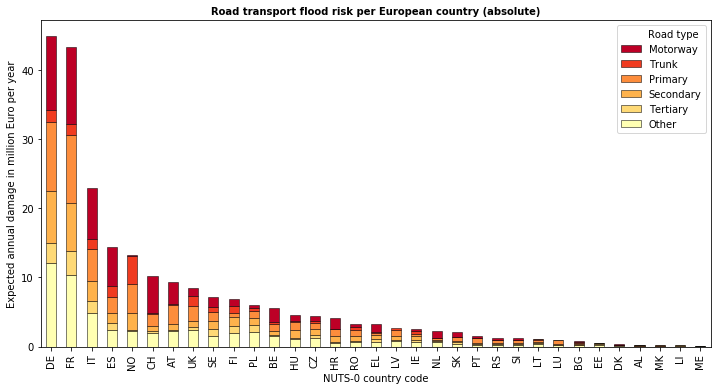

In [12]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
df3.plot(kind='bar',stacked=True,ax=ax,color=brew_1,linewidth=0.5,edgecolor='black')
fs = 10 #fontsize

handles_2, labels_2 = ax.get_legend_handles_labels() 
ax.legend(handles_2[::-1], labels_2[::-1],title='        Road type') #inverse the order of the labels

ax.set_title('Road transport flood risk per European country (absolute)', fontsize=fs, fontweight='bold')
ax.set_xlabel('NUTS-0 country code', fontsize=fs)
ax.set_ylabel('Expected annual damage in million Euro per year', fontsize=fs)

#plt.savefig("Paper_Figure_SI_3A_EAD_per_country.png", dpi=200, bbox_inches="tight")

In [15]:
df3.loc['NL'].sum()

2.2629489109111454

In [213]:
#RELATIVE

In [221]:
df4 = df3.apply(lambda x: 100 * x/x.sum(axis=0), axis=1)

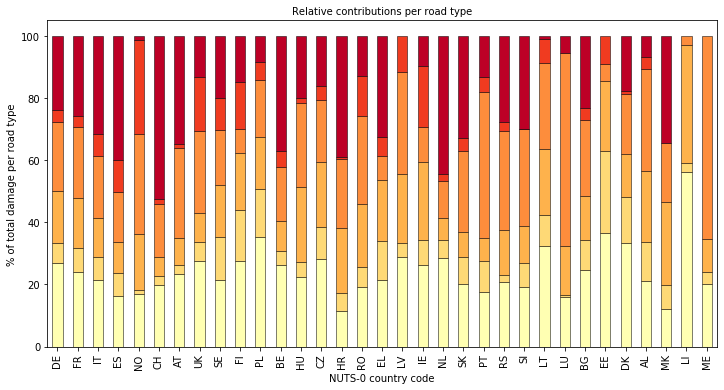

In [228]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
df4.plot(kind='bar',stacked=True,ax=ax,color=brew_1,linewidth=0.5,edgecolor='black')
fs = 10 #fontsize

#handles_2, labels_2 = ax.get_legend_handles_labels() 
#ax.legend(handles_2[::-1], labels_2[::-1],title='        Road type') #inverse the order of the labels
ax.get_legend().remove()

ax.set_title('Relative contributions per road type', fontsize=fs)
ax.set_xlabel('NUTS-0 country code', fontsize=fs)
ax.set_ylabel('% of total damage per road type', fontsize=fs)

plt.savefig("Paper_Figure_SI_3B_EAD_per_country.png", dpi=200, bbox_inches="tight")